<a href="https://colab.research.google.com/github/lostaim/MachineLearning/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import math
from numpy import * 
import numpy as np
import pandas as pd
import random
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization

In [2]:
data=pd.read_csv('PS_20174392719_1491204439457_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [3]:
data.shape

(1065286, 11)

In [4]:
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.065286e+06,1.065286e+06,1.065286e+06,1.065286e+06,1.065286e+06,1.065285e+06,1.065285e+06,1065285.0
mean,2.816894e+01,1.582514e+05,8.691881e+05,8.886605e+05,9.753366e+05,1.110364e+06,1.306693e-03,0.0
std,1.824622e+01,2.671654e+05,2.956464e+06,2.992864e+06,2.294633e+06,2.414370e+06,3.612459e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.191670e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.504933e+04,1.602150e+04,0.000000e+00,1.225233e+05,2.132630e+05,0.000000e+00,0.0
75%,4.000000e+01,2.128818e+05,1.354123e+05,1.724728e+05,9.118694e+05,1.143314e+06,0.000000e+00,0.0
max,1.190000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.205466e+07,4.216916e+07,1.000000e+00,0.0


In [15]:
data.isna().sum().sum()

3

In [6]:
data.duplicated(keep='first').any()

False

Text(0.5, 1.0, 'Distribution of Transactions over the Time')

<Figure size 72x72 with 0 Axes>

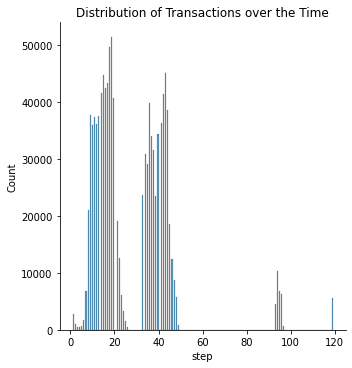

In [7]:
plt.figure(figsize=(1, 1))
sns.displot(data.step)
plt.title('Distribution of Transactions over the Time')

In [8]:
safe = data[data['isFraud']==0]
fraud = data[data['isFraud']==1]

In [9]:
fraud.shape

(1392, 11)

In [10]:
safe.shape

(1063893, 11)

<Figure size 72x72 with 0 Axes>

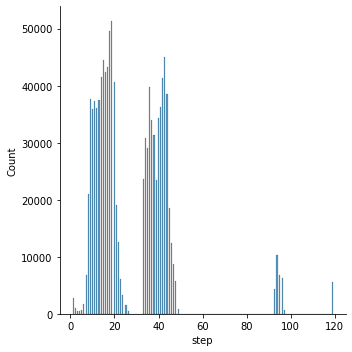

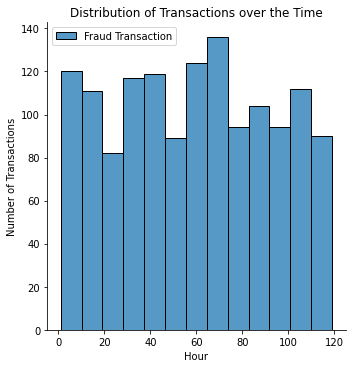

In [11]:
plt.figure(figsize=(1, 1))
sns.displot(safe.step, label="Safe Transaction")
sns.displot(fraud.step, label='Fraud Transaction')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transactions over the Time')
plt.legend()

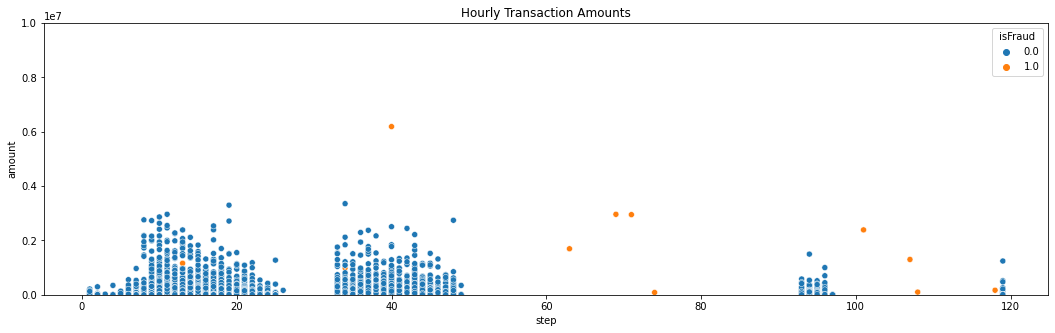

In [12]:
smalldata=data.sample(n=10000, random_state=1)
smalldata=smalldata.sort_index()
smalldata=smalldata.reset_index(drop=True)

#plot the small data
plt.figure(figsize=(18,5))
plt.ylim(0, 10000000)
plt.title('Hourly Transaction Amounts')
ax = sns.scatterplot(x="step", y="amount", hue="isFraud",
                     data=smalldata)

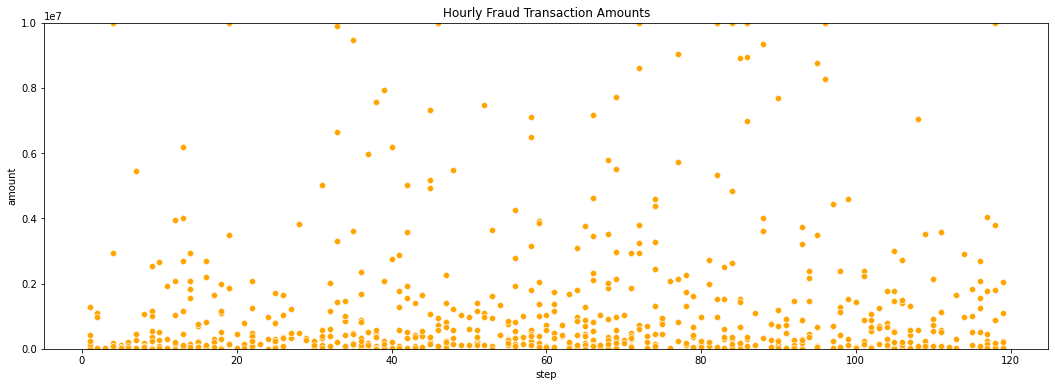

In [13]:
plt.figure(figsize=(18,6))
plt.ylim(0, 10000000)
plt.title('Hourly Fraud Transaction Amounts')
ax = sns.scatterplot(x="step", y="amount", color='orange',
                     data=fraud)